### <font color='green'>filterwarning('ignore'): It will suppress the warning in python after executing any command</font>
### <font color='green'>parse_dates=True: it will convert the date column'value in  pandas.to_datetime() which is pandas dateformat i.e. 'YYYY-MM-DD'</font>
### <font color='green'>index_col():This is for replacing the index with existing column of df.</font>

In [86]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv', parse_dates=True, index_col='Date')
df.head()

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2001-01-02    272.80    271.10   183.026   181.617    288.677    287.334
2001-01-03    269.00    267.15   178.916   177.390    281.823    281.655
2001-01-04    268.75    267.10   178.869   178.352    282.538    282.049
2001-01-05    268.00    267.40   178.488   178.148    280.775    280.882
2001-01-08    268.60    268.30   178.769   178.664    282.410    282.481

## <font color='blue'>Now let’s do some data preparation to fit the data properly in our machine learning model:</font>
## <font color='green'>So here we will customize new columns such as "return": this will be the target variable and "lagged reuturn": input feature as we can see that 'return' is the variable that will be impacted by the 'lagged return'(previous return) </font>
## <font color='green'>df.pct_change():Percentage change between the current and a prior element.</font>
## <font color='green'>df.Return.shift():Shiting value by one position to right</font>
## <font color='green'>to_frame():to_frame() function is used to convert the series object to the DataFrame and to make the input compatible with the model it is used if not done then it will show error because it accepts dataframe so it is used now shape is changed from (n,)-->(n,1)</font>

In [87]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
train = df['2001':'2018']
test = df['2019':'2020']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [88]:
X_train.shape

(4511, 1)

In [89]:
df.head()

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)  \
Date                                                                       
2001-01-04    268.75     267.1   178.869   178.352    282.538    282.049   
2001-01-05    268.00     267.4   178.488   178.148    280.775    280.882   
2001-01-08    268.60     268.3   178.769   178.664    282.410    282.481   
2001-01-09    267.75     267.0   179.855   179.195    284.507    283.590   
2001-01-10    266.70     266.3   178.777   178.665    283.573    283.298   

              Return  Lagged_Return  
Date                                 
2001-01-04 -0.018716      -1.457027  
2001-01-05  0.112317      -0.018716  
2001-01-08  0.336574       0.112317  
2001-01-09 -0.484532       0.336574  
2001-01-10 -0.262172      -0.484532

## <font color='blue'>Now as we have prepared the data to fit in a machine learning model for the task of gold price prediction, the next step is to choose a machine learning algorithm. For this task, I will use the Linear Regression algorithm:</font>

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [125]:
data={'actual_target':y_test,'predicted_target':predictions}
predicted_actual = pd.DataFrame(data=data)
predicted_actual=predicted_actual.reset_index()
predicted_actual=predicted_actual.drop(['Date'],axis=1)
predicted_actual['actual_target']

0      0.304926
1      0.588510
2     -0.817544
3      0.961013
4     -0.444978
         ...   
164    1.938423
165    0.273982
166    0.198419
167   -0.766134
168   -0.160298
Name: actual_target, Length: 169, dtype: float64

In [129]:
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score
#confusion_matrix(predicted_actual['actual_target'].values,predicted_actual['predicted_target'].values)
r2_score(y_test,predictions)
#accuracy_score(y_test,predictions)

-0.008126669378997198

## <font color='blue'>Now let’s plot the results of gold price prediction that we got from the linear regression algorithm:</font>
## <font color='blue'>Now let’s plot the results of gold price prediction that we got from the linear regression algorithm:</font>

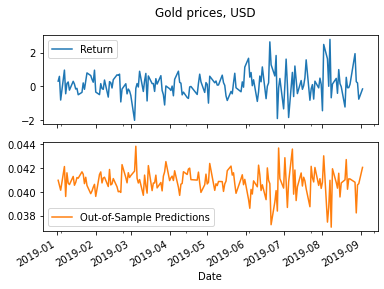

In [140]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()

## Below is just for understanding purpose

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

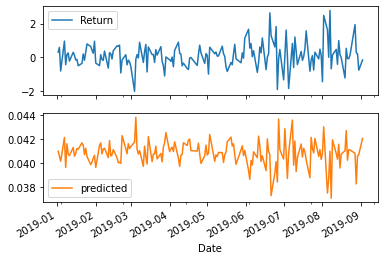

In [138]:
df1 = y_test.to_frame()
df1.head()
df1['predicted'] = model.predict(X_test)
df1.head()
df1.plot(subplots=True)

## Summary:
### From this project we have concluded that from the lagged_return we may predict the return and that we want for gold price prediction lagged_return is the feature and its known and from model once we know the predicted return we can easily know the gold trend in the market whether it up or down.